In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.exp(3 * x)

In [3]:
X=np.linspace(0.,2,200)
Y=f(X)

In [4]:
x=np.array([0,.1,.2,.5,.8,.9,1])
y=f(x)+ 2 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generate model')

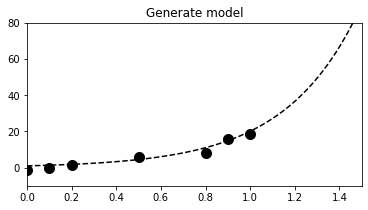

In [5]:
fig,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X,Y,'--k')
ax.plot(x,y,'ok',ms=10)
ax.set_xlim(0,1.5)
ax.set_ylim(-10,80)
ax.set_title('Generate model')

In [6]:
lr=lm.LinearRegression()
lr.fit(x[:,np.newaxis],y)
Y=lr.predict(X[:,np.newaxis])

# Linear Regression

Text(0.5, 1.0, 'Linear Regression')

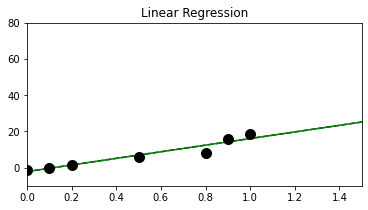

In [7]:
fig,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X,Y,'--k')
ax.plot(X,Y,'g')
ax.plot(x,y,'ok',ms=10)
ax.set_xlim(0,1.5)
ax.set_ylim(-10,80)
ax.set_title('Linear Regression')

coefficients,degree 2 :
	   14.27   3.97   0.00
coefficients,degree 5 :
	  -864.69   2212.25  -1912.31   631.54  -47.05   0.00


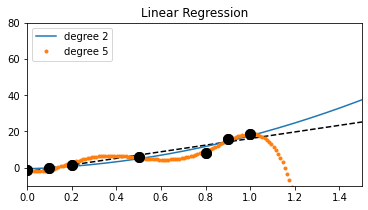

In [8]:
lrp=lm.LinearRegression()
fig,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X,Y,'--k')

for deg, s in zip([2,5],['-','.']):
    lrp.fit(np.vander(x,deg+1),y)
    Y=lrp.predict(np.vander(X,deg+1))
    ax.plot(X,Y,s,label=f'degree {deg}')
    ax.legend(loc=2)
    ax.set_xlim(0,1.5)
    ax.set_ylim(-10,80)
    print(f'coefficients,degree {deg} :\n\t',' '.join(f' {c: .2f}' for c in lrp.coef_))
    ax.plot(x,y,'ok',ms=10)
    ax.set_title('Linear Regression')
    
    

# Ridge Regression

coefficients,degree 2 :   9.83   7.64   0.00
coefficients,degree 5 :   3.19   2.95   2.91   3.57   6.05   0.00


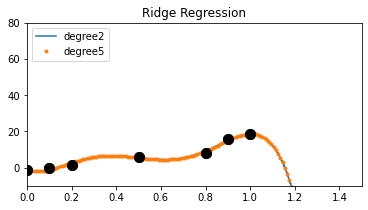

In [11]:
ridge=lm.RidgeCV()
fig,ax=plt.subplots(1,1,figsize=(6,3))
ax.plot(X,Y,'--k')

for deg, s in zip([2,5],['-','.']):
    ridge.fit(np.vander(x,deg+1),y)
    y_ridge=ridge.predict(np.vander(X,deg+1))
    ax.plot(X,Y,s,label='degree'+str(deg) )
    ax.legend(loc=2)
    ax.set_xlim(0,1.5)
    ax.set_ylim(-10,80)
    print(f'coefficients,degree {deg} :',' '.join(f' {c: .2f}' for c in ridge.coef_))
    ax.plot(x,y,'ok',ms=10)
    ax.set_title('Ridge Regression')
    

# Recognize Handwritten Digit

In [ ]:
import numpy as np
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.neighbors as nb
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
dig=ds.load_digits()
X=dig.data
y=dig.target
print(X.min(),X.max())
print(X.shape)

0.0 16.0
(1797, 64)


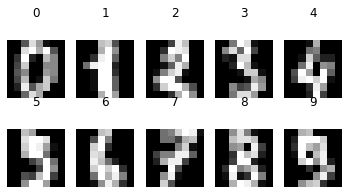

In [17]:
nrow,ncol=2,5
fig,axes = plt.subplots(nrow,ncol,figsize=(6,3))

for i in range(nrow):
    for j in range(ncol):
        k=j+i*ncol
        ax=axes[i,j]
        ax.matshow(dig.images[k, ...],cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title(dig.target[k])

In [22]:
(X_train,X_test,y_train,y_test) = ms.train_test_split(X,y,test_size=.25)

In [23]:
knc=nb.KNeighborsClassifier()

In [24]:
knc.fit(X_train,y_train)

KNeighborsClassifier()

In [25]:
knc.score(X_test,y_test)

0.9866666666666667

In [26]:
one=np.zeros((8,8))
one[1:-1,4]=16
one[2,3]=16

Text(0.5, 1.0, 'One')

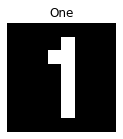

In [30]:
fig,ax=plt.subplots(1,1,figsize=(2,2))
ax.imshow(one,interpolation='none',
          cmap=plt.cm.gray)
ax.grid(False)
ax.set_axis_off()
ax.set_title("One")

In [31]:
knc.predict(one.reshape((1,-1)))

array([1])

# SVM FOR CLASSIFICATION TASK

In [32]:
import numpy as np
import pandas as pd
import sklearn
import sklearn.datasets as ds
import sklearn.model_selection as ms
import sklearn.svm as svm
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
X=np.random.randn(200,2)
y=X[:,0] + X[:,1]>1

In [34]:
est=svm.LinearSVC()
est.fit(X,y)

LinearSVC()

In [53]:
xx,yy=np.meshgrid(np.linspace(-3,3,500),np.linspace(-3,3,500))

def plot_decision_function(est,title):
    Z=est.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    cmap=plt.cm.Blues
    fig.ax=plt.subplots(1,1,figsize=(5,5))
    ax.imshow(Z,extent=(xx.min(),xx.max(),yy.min(),yy.max()), aspect='auto',origin='lower',cmap=cmap)
    ax.contour(xx,yy,Z,levels=[0],linewidths=2,colors='k')
    ax.scatter(X[:,0],X[:,1],s=50,c=.5+.5*y,edgecolors='k', lw=1,cmap=cmap,vmin=0,vmax=1)
    ax.axhline(0,color='k',ls='--')
    ax.axvline(0,color='k',ls='--')
    ax.axis([-3,3,-3,3])
    ax.set_axis_off()
    ax.set_title(title)

# THANK YOU 